![СамГТУ](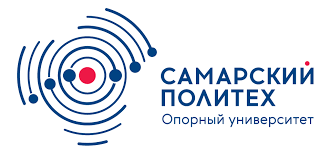 "СамГТУ") 
<p style = 'text-align: center'>
МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ РОССИЙСКОЙ ФЕДЕРАЦИИ<br>
Федеральное государственное бюджетное образовательное учреждение высшего образования<br>
«Самарский государственный технический университет»<br>
(ФГБОУ ВО «СамГТУ»)<br>
Институт автоматики и информационных технологий<br>
Кафедра "Вычислительная техника"</p><br><br><br><br><br><br>
<h3 style = 'text-align: center'> Отчёт о выполнении лабораторной работы №2<br></h3>
<h3 style = 'text-align: center'> По дисциплине "Анализ больших данных"<br></h3>
<h3 style = 'text-align: center'> На тему "Библиотека Pandas"<br></h3><br><br><br><br><br><br>
<p style = 'text-align: right'>
Проверил: профессор, д.т.н. Гавлиевский С. Л.<br><br>
Выполнили: студенты 2-ИАИТ-21ИАИТ-103М<br>
Павлов А. С.<br>
Рындина М. С.<br>
Баранов А. С.<br>
Емелина А. А.<br><br><br>
</p>
<p style = 'text-align: center'>
Самара 2022<br><br><br>
</p>

## 1. Применение функций и метод .apply()

### 1.1. Чтение из файла .csv

In [1]:
#Импорт
import pandas as pd
import numpy as np
#Чтение из файла
df = pd.read_csv("Salaries.csv")
#Вывод
df.head(6)

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3
0,1,Tom,Moscow,8-986-950-11-11,tom@mail.ru,30000,32000,40000,30,32,40
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000,32000,30,40,32
2,3,Mike,Samara,8-986-950-33-33,mike@mail.ru,32000,30000,40000,32,30,40
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000,30000,32,40,30
4,5,Sam,Kazan,8-986-950-55-55,sam@mail.ru,40000,30000,32000,40,30,32
5,6,Katy,Kazan,8-986-950-66-66,katy@mail.ru,40000,32000,30000,40,32,30


### 1.2. Создание новых столбцов путём сложения значений вручную

In [2]:
#Общая зарплата
df['total_salary'] = df['salary1'] + df['salary2'] + df['salary3']
#Общее время
df['total_time'] = df['time1'] + df['time2'] + df['time3']
#Вывод
df.head()

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time
0,1,Tom,Moscow,8-986-950-11-11,tom@mail.ru,30000,32000,40000,30,32,40,102000,102
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000,32000,30,40,32,102000,102
2,3,Mike,Samara,8-986-950-33-33,mike@mail.ru,32000,30000,40000,32,30,40,102000,102
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000,30000,32,40,30,102000,102
4,5,Sam,Kazan,8-986-950-55-55,sam@mail.ru,40000,30000,32000,40,30,32,102000,102


### 1.3. Выполнение операций над значениями столбца с помощью функции .apply()

In [3]:
#Функция np.log
df['total_salary'].apply(np.log)

0    11.532728
1    11.532728
2    11.532728
3    11.532728
4    11.532728
5    11.532728
Name: total_salary, dtype: float64

### 1.4. Создание столбцов с помощью функции .apply() и среза

In [4]:
#Среднее время по каждому человеку
df['average_time'] = df.loc[:,'time1':'time3'].apply(np.mean, axis = 1)
#Вывод
df.head()

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time,average_time
0,1,Tom,Moscow,8-986-950-11-11,tom@mail.ru,30000,32000,40000,30,32,40,102000,102,34.0
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000,32000,30,40,32,102000,102,34.0
2,3,Mike,Samara,8-986-950-33-33,mike@mail.ru,32000,30000,40000,32,30,40,102000,102,34.0
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000,30000,32,40,30,102000,102,34.0
4,5,Sam,Kazan,8-986-950-55-55,sam@mail.ru,40000,30000,32000,40,30,32,102000,102,34.0


### 1.5. Получение средних значений по всем столбцам с помощью функции .apply() и среза

In [5]:
#Средняя зарплата за 3 месяца по всем людям
df.loc[:, 'salary1':'salary3'].apply(np.mean, axis = 0)

salary1    34000.0
salary2    34000.0
salary3    34000.0
dtype: float64

### 1.6. Применение лямбда-функции в .apply()

In [6]:
#Лямбда-функция
f = lambda x: x.max() - x.min()
#Получение разницы между максимальной и минимальной зарплаты для каждого человека
df['salary_range'] = df.loc[:,'salary1':'salary3'].apply(f, axis = 1)
#Вывод
df.head()

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time,average_time,salary_range
0,1,Tom,Moscow,8-986-950-11-11,tom@mail.ru,30000,32000,40000,30,32,40,102000,102,34.0,10000
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000,32000,30,40,32,102000,102,34.0,10000
2,3,Mike,Samara,8-986-950-33-33,mike@mail.ru,32000,30000,40000,32,30,40,102000,102,34.0,10000
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000,30000,32,40,30,102000,102,34.0,10000
4,5,Sam,Kazan,8-986-950-55-55,sam@mail.ru,40000,30000,32000,40,30,32,102000,102,34.0,10000


## 2. Применение функций: группировка и агрегирование

### 2.1. Чтение из файла .csv, добавление столбцов

In [7]:
#Импорт
import pandas as pd
import numpy as np 
#Чтение из файла
df = pd.read_csv("Salaries.csv")
#Общая зарплата
df['total_salary'] = df['salary1'] + df['salary2'] + df['salary3']
#Общее время
df['total_time'] = df['time1'] + df['time2'] + df['time3']

### 2.2. Группировка

In [8]:
#Группировка по городу
res = df.groupby('city')
#Перевод в список
list(res)[0]

('Kazan',
    id  name   city            phone          mail  salary1  salary2  salary3  \
 4   5   Sam  Kazan  8-986-950-55-55   sam@mail.ru    40000    30000    32000   
 5   6  Katy  Kazan  8-986-950-66-66  katy@mail.ru    40000    32000    30000   
 
    time1  time2  time3  total_salary  total_time  
 4     40     30     32        102000         102  
 5     40     32     30        102000         102  )

### 2.3. Агрегирование для одной функции

In [9]:
#Суммирование по группе
df.groupby('city').agg('sum')

,id,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time
city,,,,,,,,,
Kazan,11,80000,62000,62000,80,62,62,204000,204
Moscow,3,60000,72000,72000,60,72,72,204000,204
Samara,7,64000,70000,70000,64,70,70,204000,204


In [10]:
#Средние значения показателей по группе
df.groupby('city').agg('mean')

,id,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time
city,,,,,,,,,
Kazan,5.5,40000.0,31000.0,31000.0,40.0,31.0,31.0,102000.0,102.0
Moscow,1.5,30000.0,36000.0,36000.0,30.0,36.0,36.0,102000.0,102.0
Samara,3.5,32000.0,35000.0,35000.0,32.0,35.0,35.0,102000.0,102.0


### 2.4. Агрегирование для нескольких функций

In [11]:
#Минимальные, максимальные и средние значения показателей по группе
df.groupby('city').agg(['min', 'max', 'mean'])

id          salary1                 salary2                 salary3  \
       min max mean     min    max     mean     min    max     mean     min   
city                                                                          
Kazan    5   6  5.5   40000  40000  40000.0   30000  32000  31000.0   30000   
Moscow   1   2  1.5   30000  30000  30000.0   32000  40000  36000.0   32000   
Samara   3   4  3.5   32000  32000  32000.0   30000  40000  35000.0   30000   

        ... time2 time3           total_salary                   total_time  \
        ...  mean   min max  mean          min     max      mean        min   
city    ...                                                                   
Kazan   ...  31.0    30  32  31.0       102000  102000  102000.0        102   
Moscow  ...  36.0    32  40  36.0       102000  102000  102000.0        102   
Samara  ...  35.0    30  40  35.0       102000  102000  102000.0        102   

                    
        max   mean  
city                
Kazan   102  102.0  
Moscow  102  102.0  
Samara  102  102.0  

[3 rows x 27 columns]

## 3. Сортировка и упорядочение

### 3.1. Чтение из файла .csv, добавление столбцов

In [12]:
#Импорт
import pandas as pd
import numpy as np 
#Чтение из файла
df = pd.read_csv("Salaries.csv")
#Общая зарплата
df['total_salary'] = df['salary1'] + df['salary2'] + df['salary3']
#Общее время
df['total_time'] = df['time1'] + df['time2'] + df['time3']

### 3.2. Сортировка по одному столбцу по возрастанию

In [13]:
#Сортировка по зарплате за первый месяц
df.sort_values('salary1')

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time
0,1,Tom,Moscow,8-986-950-11-11,tom@mail.ru,30000,32000,40000,30,32,40,102000,102
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000,32000,30,40,32,102000,102
2,3,Mike,Samara,8-986-950-33-33,mike@mail.ru,32000,30000,40000,32,30,40,102000,102
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000,30000,32,40,30,102000,102
4,5,Sam,Kazan,8-986-950-55-55,sam@mail.ru,40000,30000,32000,40,30,32,102000,102
5,6,Katy,Kazan,8-986-950-66-66,katy@mail.ru,40000,32000,30000,40,32,30,102000,102


### 3.3. Сортировка по нескольким столбцам по возрастанию

In [14]:
#Сортировка по имени и времени за первый месяц
df.sort_values(['name', 'time1'])

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000,32000,30,40,32,102000,102
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000,30000,32,40,30,102000,102
5,6,Katy,Kazan,8-986-950-66-66,katy@mail.ru,40000,32000,30000,40,32,30,102000,102
2,3,Mike,Samara,8-986-950-33-33,mike@mail.ru,32000,30000,40000,32,30,40,102000,102
4,5,Sam,Kazan,8-986-950-55-55,sam@mail.ru,40000,30000,32000,40,30,32,102000,102
0,1,Tom,Moscow,8-986-950-11-11,tom@mail.ru,30000,32000,40000,30,32,40,102000,102


### 3.4. Сортировка по нескольким столбцам по убыванию

In [15]:
#Сортировка по городу и зарплате за первый месяц
df.sort_values(['city', 'salary1'], ascending = False)

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time
2,3,Mike,Samara,8-986-950-33-33,mike@mail.ru,32000,30000,40000,32,30,40,102000,102
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000,30000,32,40,30,102000,102
0,1,Tom,Moscow,8-986-950-11-11,tom@mail.ru,30000,32000,40000,30,32,40,102000,102
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000,32000,30,40,32,102000,102
4,5,Sam,Kazan,8-986-950-55-55,sam@mail.ru,40000,30000,32000,40,30,32,102000,102
5,6,Katy,Kazan,8-986-950-66-66,katy@mail.ru,40000,32000,30000,40,32,30,102000,102


## 4. Работа с NaN-ами

### 4.1. Чтение из файла .csv, добавление столбцов

In [16]:
#Импорт
import pandas as pd
import numpy as np 
#Чтение из файла
df = pd.read_csv("SalariesWithNaN.csv")
#Общая зарплата
df['total_salary'] = df['salary1'] + df['salary2'] + df['salary3']
#Общее время
df['total_time'] = df['time1'] + df['time2'] + df['time3']

### 4.2. Вывод сводной информации по таблице

In [17]:
#Вывод
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6 non-null      int64  
 1   name          6 non-null      object 
 2   city          6 non-null      object 
 3   phone         6 non-null      object 
 4   mail          6 non-null      object 
 5   salary1       6 non-null      int64  
 6   salary2       4 non-null      float64
 7   salary3       5 non-null      float64
 8   time1         6 non-null      int64  
 9   time2         6 non-null      int64  
 10  time3         5 non-null      float64
 11  total_salary  3 non-null      float64
 12  total_time    5 non-null      float64
dtypes: float64(5), int64(4), object(4)
memory usage: 752.0+ bytes


### 4.3. Расчёт числа незаполненных ячеек в столбцах

In [18]:
#Расчёт
df.isnull().sum()

id              0
name            0
city            0
phone           0
mail            0
salary1         0
salary2         2
salary3         1
time1           0
time2           0
time3           1
total_salary    3
total_time      1
dtype: int64

### 4.4. Вставка значений в незаполненные ячейки

In [19]:
#Вставка
df.fillna(0)

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time
0,1,Tom,Moscow,8-986-950-11-11,tom@mail.ru,30000,32000.0,40000.0,30,32,0.0,102000.0,0.0
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000.0,32000.0,30,40,32.0,102000.0,102.0
2,3,Mike,Samara,8-986-950-33-33,mike@mail.ru,32000,30000.0,0.0,32,30,40.0,0.0,102.0
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000.0,30000.0,32,40,30.0,102000.0,102.0
4,5,Sam,Kazan,8-986-950-55-55,sam@mail.ru,40000,0.0,32000.0,40,30,32.0,0.0,102.0
5,6,Katy,Kazan,8-986-950-66-66,katy@mail.ru,40000,0.0,30000.0,40,32,30.0,0.0,102.0


### 4.5. Удаление строк с незаполненными ячейками

In [20]:
#Удаление
df.dropna()

,id,name,city,phone,mail,salary1,salary2,salary3,time1,time2,time3,total_salary,total_time
1,2,Bob,Moscow,8-986-950-22-22,bob@mail.ru,30000,40000.0,32000.0,30,40,32.0,102000.0,102.0
3,4,John,Samara,8-986-950-44-44,john@mail.ru,32000,40000.0,30000.0,32,40,30.0,102000.0,102.0


## 5. Иерархическое индексирование

### 5.1. Создание датафрейма

In [21]:
#Импорт
import pandas as pd
#Создание датафрейма
df = pd.DataFrame([[1, 'Tom', 1111, 111111, '89869501111', 'tom@mail.ru', 'Org1', 20000], 
                   [2, 'Bob', 2222, 222222, '89869502222', 'bob@mail.ru', 'Org2', 25000], 
                   [3, 'Mike', 3333, 333333, '89869503333', 'mike@mail.ru', 'Org3', 30000],
                   [4, 'John', 4444, 444444, '89869504444', 'john@mail.ru', 'Org4', 35000],
                   [5, 'Sam', 5555, 555555, '89869505555', 'sam@mail.ru', 'Org5', 40000],
                   [6, 'Katy', 6666, 666666, '89869506666', 'katy@mail.ru', None, 0]])
#Наименование столбцов датафрейма
df.columns = ['id', 'name', 'passport_series', 'passport_number', 'phone', 'email', 'workplace', 'salary']
#Вывод
df

,id,name,passport_series,passport_number,phone,email,workplace,salary
0,1,Tom,1111,111111,89869501111,tom@mail.ru,Org1,20000
1,2,Bob,2222,222222,89869502222,bob@mail.ru,Org2,25000
2,3,Mike,3333,333333,89869503333,mike@mail.ru,Org3,30000
3,4,John,4444,444444,89869504444,john@mail.ru,Org4,35000
4,5,Sam,5555,555555,89869505555,sam@mail.ru,Org5,40000
5,6,Katy,6666,666666,89869506666,katy@mail.ru,None,0


### 5.2. Использование мульти-индекса

In [22]:
#Создание мульти-индекса
df.set_index(['passport_series', 'passport_number'], inplace = True)
#Вывод
df

,,id,name,phone,email,workplace,salary
passport_series,passport_number,,,,,,
1111,111111,1,Tom,89869501111,tom@mail.ru,Org1,20000
2222,222222,2,Bob,89869502222,bob@mail.ru,Org2,25000
3333,333333,3,Mike,89869503333,mike@mail.ru,Org3,30000
4444,444444,4,John,89869504444,john@mail.ru,Org4,35000
5555,555555,5,Sam,89869505555,sam@mail.ru,Org5,40000
6666,666666,6,Katy,89869506666,katy@mail.ru,None,0


### 5.3. Просмотр объекта Index

In [23]:
#Вывод объекта Index
df.index

MultiIndex([(1111, 111111),
            (2222, 222222),
            (3333, 333333),
            (4444, 444444),
            (5555, 555555),
            (6666, 666666)],
           names=['passport_series', 'passport_number'])

### 5.4. Обращение к строке по passport_series

In [24]:
#Обращение к строке по серии паспорта
df.loc[1111]

,id,name,phone,email,workplace,salary
passport_number,,,,,,
111111,1,Tom,89869501111,tom@mail.ru,Org1,20000


### 5.5. Обращение к строке по passport_series и passport_number

In [25]:
#Обращение к строке по серии и номеру паспорта
df.loc[(2222, 222222)]

id                     2
name                 Bob
phone        89869502222
email        bob@mail.ru
workplace           Org2
salary             25000
Name: (2222, 222222), dtype: object

### 5.6. Сортировка по мультииндексу

In [26]:
#Сортировка по номеру и серии паспорта (по убыванию)
df.sort_index(ascending = False)

,,id,name,phone,email,workplace,salary
passport_series,passport_number,,,,,,
6666,666666,6,Katy,89869506666,katy@mail.ru,None,0
5555,555555,5,Sam,89869505555,sam@mail.ru,Org5,40000
4444,444444,4,John,89869504444,john@mail.ru,Org4,35000
3333,333333,3,Mike,89869503333,mike@mail.ru,Org3,30000
2222,222222,2,Bob,89869502222,bob@mail.ru,Org2,25000
1111,111111,1,Tom,89869501111,tom@mail.ru,Org1,20000


## 6. Работа с пропущенными значениями (NaN)

### 6.1. Создание датафрейма с NaN

In [27]:
#Импорт
import pandas as pd
import numpy as np
#Создание датафрейма
df = pd.DataFrame([[1, 'Tom', '89869501111', 'tom@mail.ru', 'Org1', np.nan, 30], 
                   [2, 'Bob', '89869502222', 'bob@mail.ru', 'Org2', 25000, np.nan], 
                   [3, 'Mike', '89869503333', 'mike@mail.ru', 'Org3', np.nan, 40],
                   [4, 'John', '89869504444', 'john@mail.ru', 'Org4', 35000, np.nan],
                   [5, 'Sam', '89869505555', 'sam@mail.ru', 'Org5', np.nan, 40],
                   [6, 'Katy', '89869506666', 'katy@mail.ru', 'Org6', np.nan, np.nan]])
#Наименование столбцов датафрейма
df.columns = ['id', 'name', 'phone', 'email', 'workplace', 'salary', 'worktime']
#Вывод
df

,id,name,phone,email,workplace,salary,worktime
0,1,Tom,89869501111,tom@mail.ru,Org1,NaN,30.0
1,2,Bob,89869502222,bob@mail.ru,Org2,25000.0,NaN
2,3,Mike,89869503333,mike@mail.ru,Org3,NaN,40.0
3,4,John,89869504444,john@mail.ru,Org4,35000.0,NaN
4,5,Sam,89869505555,sam@mail.ru,Org5,NaN,40.0
5,6,Katy,89869506666,katy@mail.ru,Org6,NaN,NaN


### 6.2. Заполнение элементов с NaN нулями

In [28]:
#Заполнение нулями
df.fillna(0)

,id,name,phone,email,workplace,salary,worktime
0,1,Tom,89869501111,tom@mail.ru,Org1,0.0,30.0
1,2,Bob,89869502222,bob@mail.ru,Org2,25000.0,0.0
2,3,Mike,89869503333,mike@mail.ru,Org3,0.0,40.0
3,4,John,89869504444,john@mail.ru,Org4,35000.0,0.0
4,5,Sam,89869505555,sam@mail.ru,Org5,0.0,40.0
5,6,Katy,89869506666,katy@mail.ru,Org6,0.0,0.0


### 6.3. Заполнение элементов с NaN средними значениями по столбцу

In [29]:
#Заполнение средними значениями
df.fillna(df.mean())

C:\Users\death\AppData\Local\Temp/ipykernel_16592/4183553423.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,name,phone,email,workplace,salary,worktime
0,1,Tom,89869501111,tom@mail.ru,Org1,30000.0,30.000000
1,2,Bob,89869502222,bob@mail.ru,Org2,25000.0,36.666667
2,3,Mike,89869503333,mike@mail.ru,Org3,30000.0,40.000000
3,4,John,89869504444,john@mail.ru,Org4,35000.0,36.666667
4,5,Sam,89869505555,sam@mail.ru,Org5,30000.0,40.000000
5,6,Katy,89869506666,katy@mail.ru,Org6,30000.0,36.666667


### 6.4. Использование различного заполнения элементов NaN для разных столбцов

In [30]:
#Различное заполнение для разных столбцов
df.fillna({'salary': df['salary'].mean(), 
             'worktime': df['worktime'].median()})

,id,name,phone,email,workplace,salary,worktime
0,1,Tom,89869501111,tom@mail.ru,Org1,30000.0,30.0
1,2,Bob,89869502222,bob@mail.ru,Org2,25000.0,40.0
2,3,Mike,89869503333,mike@mail.ru,Org3,30000.0,40.0
3,4,John,89869504444,john@mail.ru,Org4,35000.0,40.0
4,5,Sam,89869505555,sam@mail.ru,Org5,30000.0,40.0
5,6,Katy,89869506666,katy@mail.ru,Org6,30000.0,40.0


### 6.5. Заполнение элементов NaN значениями из ячейки выше

In [31]:
#Заполнение значениями из ячейки выше
df.fillna(method = 'ffill')

,id,name,phone,email,workplace,salary,worktime
0,1,Tom,89869501111,tom@mail.ru,Org1,NaN,30.0
1,2,Bob,89869502222,bob@mail.ru,Org2,25000.0,30.0
2,3,Mike,89869503333,mike@mail.ru,Org3,25000.0,40.0
3,4,John,89869504444,john@mail.ru,Org4,35000.0,40.0
4,5,Sam,89869505555,sam@mail.ru,Org5,35000.0,40.0
5,6,Katy,89869506666,katy@mail.ru,Org6,35000.0,40.0


### 6.6. Заполнение элементов NaN значениями из ячейки ниже

In [32]:
#Заполнение значениями из ячейки ниже
df.fillna(method = 'bfill')

,id,name,phone,email,workplace,salary,worktime
0,1,Tom,89869501111,tom@mail.ru,Org1,25000.0,30.0
1,2,Bob,89869502222,bob@mail.ru,Org2,25000.0,40.0
2,3,Mike,89869503333,mike@mail.ru,Org3,35000.0,40.0
3,4,John,89869504444,john@mail.ru,Org4,35000.0,40.0
4,5,Sam,89869505555,sam@mail.ru,Org5,NaN,40.0
5,6,Katy,89869506666,katy@mail.ru,Org6,NaN,NaN
